In [49]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

    
df.dropna(inplace=True)
df = df.reset_index()[df.columns]
#print (df.isnull().sum())
'''def tenure_lab(t) :
    
    if t <= 12 :
        return 1
    elif (t > 12) & (t <= 24 ):
        return 2
    elif (t > 24) & (t <= 48) :
        return 3
    elif (t > 48) & (t <= 60) :
        return 4
    elif t > 60 :
        return 5

df["tenure"]=df["tenure"].map(tenure_lab)'''


#since we have 72 categories in tenure we will reduce the number of categories in it
#therefoe we made above function and to check how many categories each column has now,we are using the following loop

for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()
    #print ("Feature", c_n,"has", unique_cat,"unique categories")


X=df.drop('Churn',1)
Y=df.Churn

X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()

num_cols   = [x for x in X.columns if x not in todummy_list]
'''todummy_list.remove('tenure')
num_cols.insert(3,'tenure')'''
X_org=X.copy()

for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    #dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)
X=X.drop(['StreamingTV_No internet service','StreamingMovies_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service'],axis=1)
    
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
Y= le.fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


from sklearn.preprocessing import StandardScaler
# Fitting parameters for scaling x_train for the numerical columns 
std = StandardScaler().fit(x_train[num_cols])
#Transforming the the original data
x_train_transformed=std.transform(x_train[num_cols])
x_train_transformed_df = pd.DataFrame(x_train_transformed,columns=num_cols)
x_train=x_train.drop(num_cols,1)
x_train=pd.concat([x_train.reset_index(drop=True),x_train_transformed_df.reset_index(drop=True) ],axis=1)

#Transforming the the test data's numerical with x_train scaled parameters
x_test_transformed=std.transform(x_test[num_cols])
x_test_transformed_df = pd.DataFrame(x_test_transformed,columns=num_cols)
x_test=x_test.drop(num_cols,1)
x_test=pd.concat([x_test.reset_index(drop=True),x_test_transformed_df .reset_index(drop=True) ],axis=1)

std = StandardScaler().fit(X[num_cols])
x_transformed=std.transform(X[num_cols])

x_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)
x_kf=X.drop(num_cols,1)
x_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)
print(x_train.shape)

(5625, 41)


C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:78: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:84: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:90: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.


In [50]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    # all parameters not specified are set to their defaults
    
   
        
        
        
    
 
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    
    print("tpr=",tpr," and 1-fpr=", 1-fpr)

    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    '''probs = m.predict_proba(x_test)
    probs = probs[:, 1]


    fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

    #plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr1, tpr1, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)'''


    import matplotlib.pyplot as plt
    import seaborn as sns

    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);


In [51]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)

In [52]:
os

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=0, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')

In [53]:
os_smote_X,os_smote_Y = os.fit_sample(x_train,y_train)

In [54]:
cols=[i for i in x_train.columns]
os_smote_X=pd.DataFrame(data=os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=['Churn'])
print(os_smote_X.shape)
print(os_smote_Y.shape)
print(8250-5625)

(8250, 41)
(8250, 1)
2625


In [56]:

y_train=pd.DataFrame(data=y_train,columns=['Churn'])
print(y_train['Churn'].value_counts())
print(os_smote_Y['Churn'].value_counts())

0    4125
1    1500
Name: Churn, dtype: int64
1    4125
0    4125
Name: Churn, dtype: int64


		-------------------LOGISTIC REGRESSION_WO_Feature_selection----------------



              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1038
           1       0.52      0.81      0.63       369

   micro avg       0.75      0.75      0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.77      1407

[[760 278]
 [ 71 298]]
tpr= [0.         0.80758808 1.        ]  and 1-fpr= [1.         0.73217726 0.        ]


C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


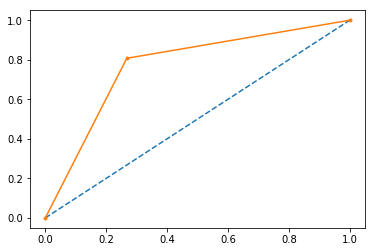

AUC: 0.770


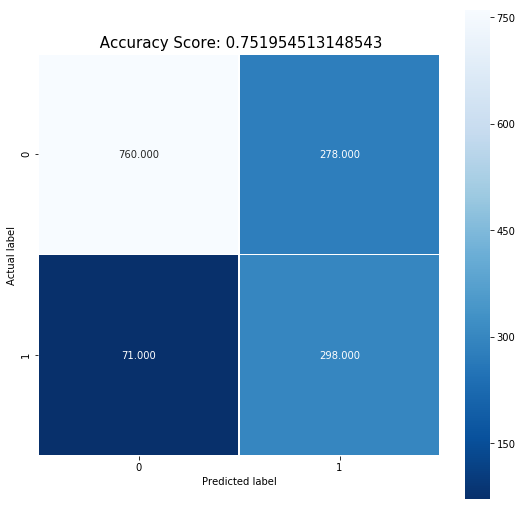

In [57]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_WO_Feature_selection}---------------------------------"""

print ('\t\t-------------------LOGISTIC REGRESSION_WO_Feature_selection----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(os_smote_X, os_smote_Y)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)

<--------------------------------------XG-BOOST------------------------------------->


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1038
           1       0.57      0.69      0.63       369

   micro avg       0.78      0.78      0.78      1407
   macro avg       0.73      0.76      0.74      1407
weighted avg       0.80      0.78      0.79      1407

[[848 190]
 [113 256]]
tpr= [0.         0.69376694 1.        ]  and 1-fpr= [1.         0.81695568 0.        ]


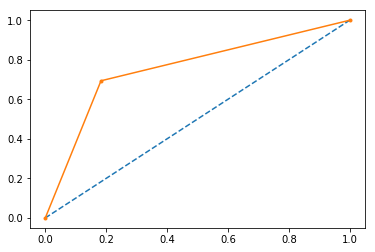

AUC: 0.755


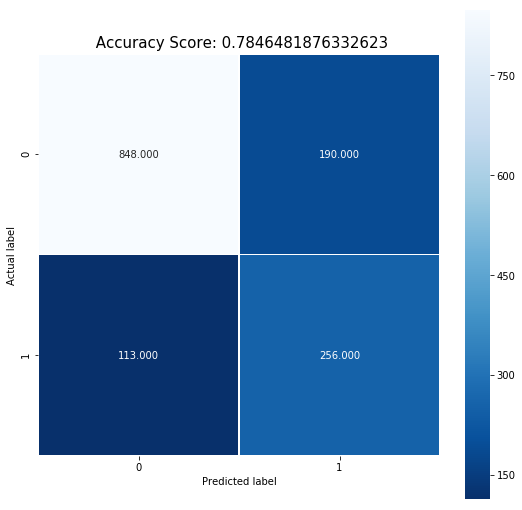

In [61]:
print("<--------------------------------------XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
m=clf.fit(os_smote_X, os_smote_Y) 
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
roc_plot(m,x_test,y_test,predictions)

In [64]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1038
           1       0.57      0.55      0.56       369

   micro avg       0.77      0.77      0.77      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407

[[886 152]
 [165 204]]
tpr= [0.         0.55284553 1.        ]  and 1-fpr= [1.         0.85356455 0.        ]


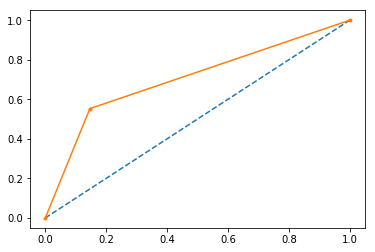

AUC: 0.703


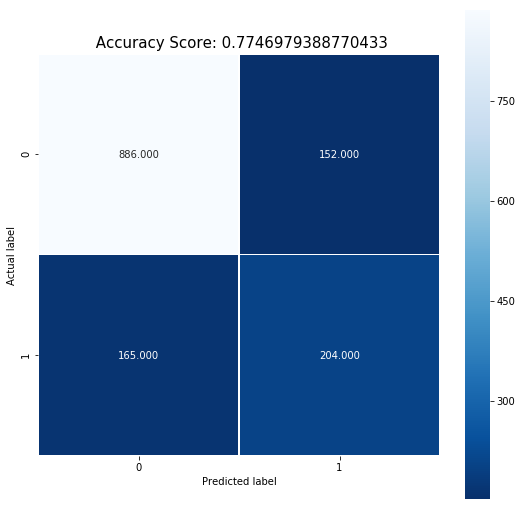

In [65]:
m=xgc.fit(os_smote_X, os_smote_Y) 
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
roc_plot(m,x_test,y_test,predictions)

In [74]:
'''-------------------------FEATURE SELECTION(mutual_info_classif)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif

test = SelectKBest(chi2, k=13)
fit=test.fit(x_train,y_train)
indices_selected= fit.get_support(indices=True)
columns_selected= [X.columns[i] for i in indices_selected]
x_train_selected=x_train[columns_selected]
x_test_selected=x_test[columns_selected]

print(x_train_selected.shape)
print(x_test_selected.shape)

ValueError: Input X must be non-negative.

In [75]:
indices_selected

array([ 2,  6,  8, 13, 15, 17, 19, 20, 23, 24, 38, 39, 40], dtype=int64)

In [71]:
os_smote_X_feat,os_smote_Y_feat = os.fit_sample(x_train_selected,y_train)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
cols=[i for i in x_train_selected.columns]
os_smote_X_feat=pd.DataFrame(data=os_smote_X_feat,columns=cols)
os_smote_Y_feat = pd.DataFrame(data = os_smote_Y_feat,columns=['Churn'])
print(os_smote_X.shape)
print(os_smote_Y.shape)


(8250, 13)
(8250,)
